## Total sattelites launched into orbit by year

quick notebook using the UCS sattelites database and our world in data to show the number of sattelites launched per year and total number orbiting earth per year. This is has a huge impact on ground based astrophysical observations and is a growing concern in the community. The final plot in this notebook was produced to include in my PhD thesis (Polaris) for illustration of the problem.

Data for yearly number of objects launched is obtained from our world in data: https://ourworldindata.org/grapher/yearly-number-of-objects-launched-into-outer-space

Data for yearly number of satellites launched is obtained from UCS satellite database:
https://www.ucsusa.org/resources/satellite-database

In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
%matplotlib notebook

In [55]:
yearly_launches = pd.read_csv('data/yearly-number-of-objects-launched-into-outer-space.csv')
numlaunches = yearly_launches[yearly_launches['Entity'] == 'World'][['Year', 'yearly_launches']]

In [31]:
yearly_launches.sort_values(['Year'], ascending=True)

,Entity,Code,Year,yearly_launches
1053,World,OWID_WRL,1957,2
728,Russia,RUS,1957,2
1054,World,OWID_WRL,1958,8
974,United States,USA,1958,7
729,Russia,RUS,1958,1
...,...,...,...,...
660,Moldova,MDA,2022,1
644,Malaysia,MYS,2022,1
30,Armenia,ARM,2022,1
809,Singapore,SGP,2022,3


In [32]:
numlaunches

,Year,yearly_launches
1053,1957,2
1054,1958,8
1055,1959,14
1056,1960,20
1057,1961,38
...,...,...
1114,2018,453
1115,2019,586
1116,2020,1274
1117,2021,1810


<IPython.core.display.Javascript object>


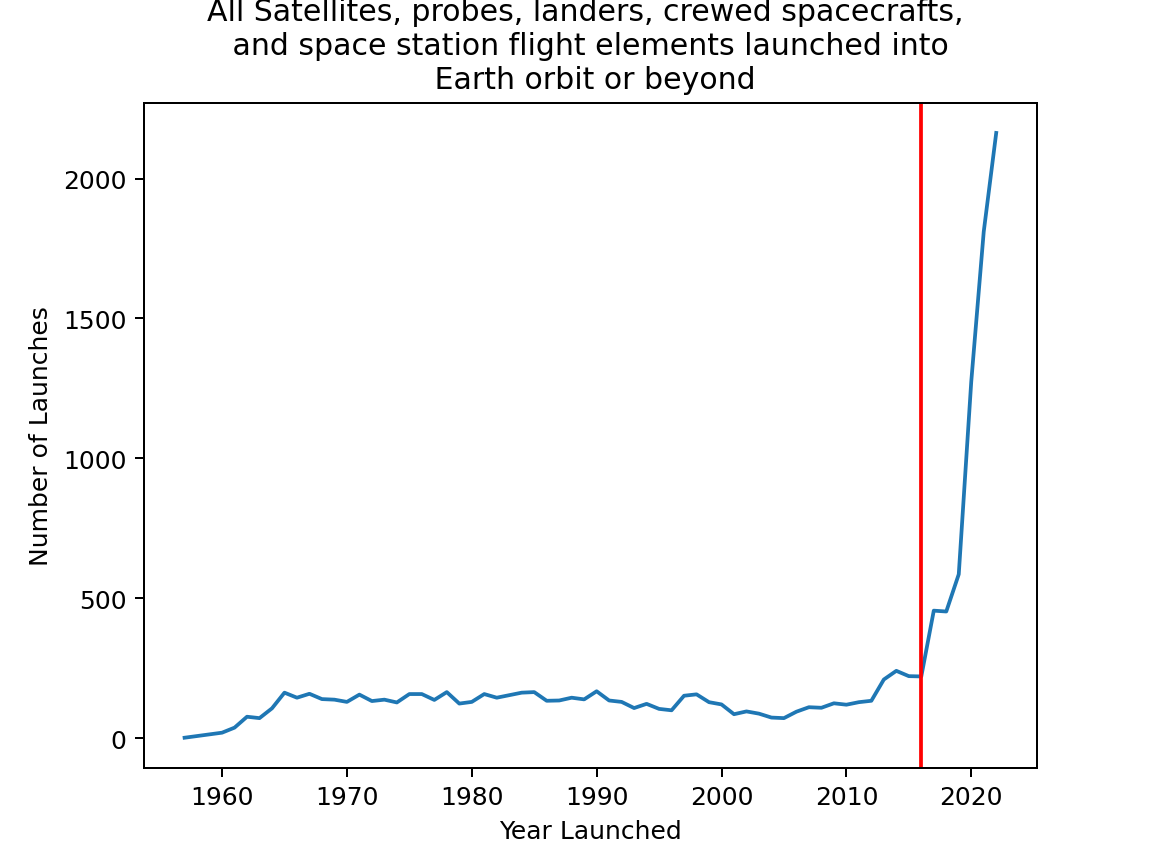

Text(0.5, 1.0, 'All Satellites, probes, landers, crewed spacecrafts, \n and space station flight elements launched into \n Earth orbit or beyond')

In [33]:
plt.figure()
plt.plot(numlaunches['Year'], numlaunches['yearly_launches'])
plt.axvline(x = 2016, color = 'r')
plt.ylabel('Number of Launches')
plt.xlabel('Year Launched')
plt.title('All Satellites, probes, landers, crewed spacecrafts, \n and space station flight elements launched into \n Earth orbit or beyond')

In [56]:
satellites  = pd.read_excel('data/UCS-Satellite-Database-5-1-2022.xls')[['Operator/Owner', 'Purpose', 'Date of Launch', 'Expected Lifetime (yrs.)', 'Comments']]
satellites['Date of Launch'] =  pd.to_datetime(satellites['Date of Launch'], format='%y%m%d').dt.strftime('%Y')
satellites['Comments'].loc[satellites['Comments'].isnull().values] = ''
satellites = satellites[~satellites['Date of Launch'].isnull().values]
satellites['Date of Launch'] = [int(d) for d in satellites['Date of Launch'].values] 

/var/folders/n8/mc27w99j19q1kx20z133q0w40000gp/T/ipykernel_11959/2923779477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satellites['Comments'].loc[satellites['Comments'].isnull().values] = ''


In [36]:
satellites['Date of Launch'].max()

2022

In [37]:
satellites[satellites['Operator/Owner'] == 'SpaceX']

,Operator/Owner,Purpose,Date of Launch,Expected Lifetime (yrs.),Comments
2799,SpaceX,Communications,2019,NaN,Second launch of 60 satellites for SpaceX cons...
2800,SpaceX,Communications,2019,NaN,
2801,SpaceX,Communications,2019,NaN,
2802,SpaceX,Communications,2019,NaN,
2803,SpaceX,Communications,2019,NaN,
...,...,...,...,...,...
5013,SpaceX,Communications,2019,4.0,
5014,SpaceX,Communications,2019,4.0,
5015,SpaceX,Communications,2019,4.0,
5016,SpaceX,Communications,2019,4.0,


In [38]:
numsats = satellites.groupby("Date of Launch").size()

In [39]:
cats = satellites.groupby("Purpose").size()
cats

Purpose
Amateur Radio                                        8
Communications                                    3602
Communications/Maritime Tracking                     5
Communications/Navigation                            1
Communications/Technology Development                5
Earth Observarion                                    1
Earth Observation                                 1113
Earth Observation                                    4
Earth Observation/Communications                     2
Earth Observation/Communications/Space Science       1
Earth Observation/Earth Science                      1
Earth Observation/Space Science                      1
Earth Observation/Technology Development             7
Earth Science                                       23
Earth Science/Earth Observation                      1
Earth/Space Observation                              2
Educational                                          1
Mission Extension Technology                         2
Na

Communications based sattelites are the most likely to emit in bands relevant to ground based observations and are therefore considered here

In [40]:
communications = satellites[(satellites['Purpose'] == 'Communications') |
                            (satellites['Purpose'] == 'Communications/Maritime Tracking') |
                            (satellites['Purpose'] == 'Communications/Navigation') |
                            (satellites['Purpose'] == 'Communications/Technology Development') |
                            (satellites['Purpose'] == 'Amateur Radio')]
len(communications)

3621

In [41]:
numcomms = communications.groupby("Date of Launch").size()

In [42]:
spacex = satellites[satellites['Operator/Owner'] == 'SpaceX']
numspacex = spacex.groupby("Date of Launch").size()

My experiment operated in the X-band, however this does not appear to be a fully comprehensive way of determining what sattelites emit in this band and will be omitted from the final plot

In [43]:
x_band = satellites[satellites['Comments'].str.contains("X-band", case=False)]
x_band

,Operator/Owner,Purpose,Date of Launch,Expected Lifetime (yrs.),Comments
112,Istanbul Technical University,Earth Observation,2021,NaN,Take images and transmit it to a ground statio...
120,Japan Space Systems,Earth Observation,2018,3.0,X-band radar.
367,Italian Space Agency/Ministry of Defense,Earth Observation,2007,5.0,Earth imaging; synthetic aperture radar (SAR) ...
368,Italian Space Agency/Ministry of Defense,Earth Observation,2008,5.0,Earth imaging; synthetic aperture radar (SAR) ...
369,Italian Space Agency/Ministry of Defense,Earth Observation,2010,5.0,Earth imaging; synthetic aperture radar (SAR) ...
370,Italian Space Agency/Ministry of Defense,Earth Observation,2022,5.0,Second generation. Earth imaging; synthetic ap...
625,US Air Force,Communications,2003,10.0,Super High Frequency (SHF) for U.S. government...
626,US Air Force,Communications,2003,10.0,Super High Frequency (SHF) for U.S. government...
627,US Air Force,Communications,1997,10.0,Super High Frequency (SHF) for U.S. government...
628,US Air Force,Communications,2000,10.0,Super High Frequency (SHF) for U.S. government...


In [44]:
numxband = x_band.groupby("Date of Launch").size()

In [45]:
def changenull(value, year):
    if pd.isnull(value) and year >= 2019:
        return 10 #assume launches after 2019 with missing expected lifetimes will still be operational now
    else:
        return value

In [46]:
satellites_expected = satellites.copy()
satellites_expected['Expected Lifetime (yrs.)'] = [changenull(value, year) for value, year in zip(satellites_expected['Expected Lifetime (yrs.)'], satellites_expected['Date of Launch'])]
satellites_expected['expected'] = np.floor(satellites_expected['Date of Launch'] + satellites_expected['Expected Lifetime (yrs.)'])
satellites_expected = satellites_expected[~satellites_expected['expected'].isnull().values]
satellites_expected['expected'] = [int(d) for d in satellites_expected['expected']]
satellites_expected.sort_values(['expected'], ascending=False)

,Operator/Owner,Purpose,Date of Launch,Expected Lifetime (yrs.),Comments,expected
5195,Turksat,Communications,2021,30.0,42 Ku-band transponders. Its electric thruster...,2051
2272,General Atomics - Electromagnetic Systems Group,Technology Development,2019,25.0,One of the payloads is NASA's DSAC (Deep Space...,2044
74,Space-Communication Ltd.,Communications,2019,20.0,Replaces Amos 5 which failed in 2015.,2039
2517,China Aerospace Science and Technology Corpora...,Technology Development,2019,20.0,Biggest Chinese communications satellite built...,2039
2491,SES S.A.,Communications,2021,18.0,Largest satellite ever built for SES or built ...,2039
...,...,...,...,...,...,...
5213,US Navy,Communications,1995,4.0,Ultra-High Frequency (UHF) communications and ...,1999
5074,National Aeronautics and Space Administration ...,Communications,1988,10.0,Backup; still partially operational.,1998
2569,Intelsat/Paradigm Secure Communications (wholl...,Communications,1990,7.0,Spare. In March 2010 it was announced that the...,1997
2461,Instituto Nacional de Pesquisas Espaciais (INPE),Earth Observation,1993,3.0,Collects meteorological and environmental data...,1996


In [47]:
%%time
count = defaultdict(int)
first_year = satellites_expected['Date of Launch'].values.min()
last_year = satellites_expected['Date of Launch'].values.max()

for y in range(first_year, last_year+1):
        for s in range(len(satellites_expected)):
            if satellites_expected.iloc[s]['Date of Launch'] > y:
                continue
            if satellites_expected.iloc[s]['expected'] >= y:
                count[y] += 1

CPU times: user 17.7 s, sys: 135 ms, total: 17.8 s
Wall time: 18 s


In [48]:
satellites_com_expected = communications.copy()
satellites_com_expected['expected'] = np.floor(satellites_com_expected['Date of Launch'] + satellites_com_expected['Expected Lifetime (yrs.)'])
satellites_com_expected = satellites_com_expected[~satellites_com_expected['expected'].isnull().values]
satellites_com_expected['expected'] = [int(d) for d in satellites_com_expected['expected']]
satellites_com_expected.sort_values(['expected'], ascending=False)

,Operator/Owner,Purpose,Date of Launch,Expected Lifetime (yrs.),Comments,expected
5195,Turksat,Communications,2021,30.0,42 Ku-band transponders. Its electric thruster...,2051
2491,SES S.A.,Communications,2021,18.0,Largest satellite ever built for SES or built ...,2039
74,Space-Communication Ltd.,Communications,2019,20.0,Replaces Amos 5 which failed in 2015.,2039
5444,China Satellite Communication Corp. (China Sat...,Communications,2022,15.0,Chinasat 6D will cover users across Southeast ...,2037
1118,"INMARSAT,Ltd.",Communications,2021,15.0,,2036
...,...,...,...,...,...,...
5075,SES S.A.,Communications,1991,10.0,Used by South Pole station.,2001
5213,US Navy,Communications,1995,4.0,Ultra-High Frequency (UHF) communications and ...,1999
5074,National Aeronautics and Space Administration ...,Communications,1988,10.0,Backup; still partially operational.,1998
2569,Intelsat/Paradigm Secure Communications (wholl...,Communications,1990,7.0,Spare. In March 2010 it was announced that the...,1997


In [49]:
%%time
count_comm = defaultdict(int)
first_year = satellites_com_expected['Date of Launch'].values.min()
last_year = satellites_com_expected['Date of Launch'].values.max()

for y in range(first_year, last_year+1):
        for s in range(len(satellites_com_expected)):
            if satellites_com_expected.iloc[s]['Date of Launch'] > y:
                continue
            if satellites_com_expected.iloc[s]['expected'] >= y:
                count_comm[y] += 1

CPU times: user 9.99 s, sys: 50.3 ms, total: 10 s
Wall time: 10.1 s


In [50]:
spacex_expected = spacex.copy()
spacex_expected['expected'] = np.floor(spacex_expected['Date of Launch'] + spacex_expected['Expected Lifetime (yrs.)'])
spacex_expected = spacex_expected[~spacex_expected['expected'].isnull().values]
spacex_expected['expected'] = [int(d) for d in spacex_expected['expected']]
spacex_expected.sort_values(['expected'], ascending=False)

,Operator/Owner,Purpose,Date of Launch,Expected Lifetime (yrs.),Comments,expected
4594,SpaceX,Communications,2022,4.0,,2026
4723,SpaceX,Communications,2022,4.0,,2026
4697,SpaceX,Communications,2022,4.0,,2026
4698,SpaceX,Communications,2022,4.0,,2026
4699,SpaceX,Communications,2022,4.0,,2026
...,...,...,...,...,...,...
5010,SpaceX,Communications,2019,4.0,,2023
5009,SpaceX,Communications,2019,4.0,,2023
5008,SpaceX,Communications,2019,4.0,,2023
5007,SpaceX,Communications,2019,4.0,,2023


In [51]:
%%time
count_spacex = defaultdict(int)
first_year = spacex_expected['Date of Launch'].values.min()
last_year = spacex_expected['Date of Launch'].values.max()

for y in range(first_year, last_year+1):
        for s in range(len(spacex_expected)):
            if spacex_expected.iloc[s]['Date of Launch'] > y:
                continue
            if spacex_expected.iloc[s]['expected'] >= y:
                count_comm[y] += 1

CPU times: user 902 ms, sys: 9.17 ms, total: 911 ms
Wall time: 920 ms


In [52]:
year = list(count.keys())
total = list(count.values())

In [53]:
year_comm = list(count_comm.keys())
total_comm = list(count_comm.values())

<IPython.core.display.Javascript object>


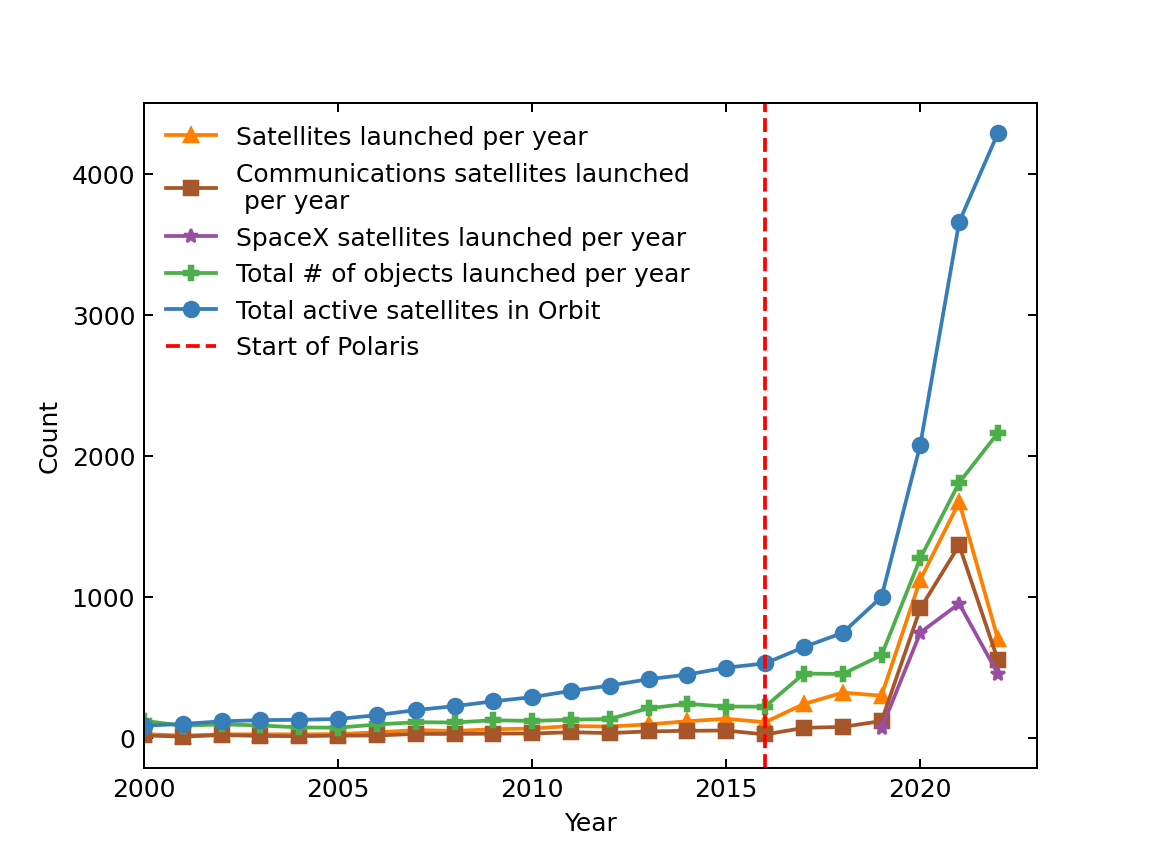

In [54]:
plt.figure()
plt.plot(numsats.index, numsats.values, '^-', color='#ff7f00', label='Satellites launched per year')
plt.plot(numcomms.index, numcomms.values, 's-', color='#a65628', label='Communications satellites launched \n per year')
plt.plot(numspacex.index, numspacex.values, '*-', color='#984ea3', label='SpaceX satellites launched per year')
plt.plot(numlaunches['Year'], numlaunches['yearly_launches'], 'P-', color='#4daf4a', label='Total # of objects launched per year')
plt.plot(year, total, 'o-', color='#377eb8', label='Total active satellites in Orbit')
#plt.plot(year_comm, total_comm, label='Total Number of Communications based Sattelites in Orbit')
plt.axvline(x = 2016, color = 'r', linestyle='--', label = 'Start of Polaris')
plt.xlabel('Year')
plt.ylabel('Count')
#plt.title('Number of Sattelites launched into Earths Orbit per year')
plt.xlim([2000,2023])
plt.legend(frameon=False)
plt.tick_params(which = 'both', direction='in', bottom=True, top=True,left=True,right=True)
plt.savefig('sattelite_launches2.png')
#plt.grid()

Number of satellites launched into Earths Orbit per year (orange) and total number of satellites orbitting earth in a given year (blue). Total number of satelittes orbiting Earth in a given year is calculated as the cumulative sum of launched satellites per year minus the inactive satellites based on expected lifetimes. Communications based satellites (brown) are the most likely to emit in the X-band (and other bands relevant to ground based observations) and make up the majority of satellites deployed. The green line shows all satellites, probes, landers, crewed spacecraft, and space station flight elements launched into earths orbit and beyond per year, showing the rapid growth in the space economy. 

The drop in number of launches in 2022 could be due to a variety of factors such as the pandemic, market changes, or project timelines, and is not necessarily indicitive of long term growth. 

To give some scale to the problem, the celestial sphere has a surface area of $\sim$40,000 deg$^2$, that means there was roughly 1 active satellite per 10 square degree patch on the sky in 2022, and with starlinks plans to launch up to 30,000 satellites this could reach one satellite per square degree on the sky. 

In [54]:
4300/41000 #1 sattelite per 10 degree patch on the sky, starlink has plans to launch up to 30k spacecraft

0.1048780487804878